## Import Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nsepy
from datetime import date
import matplotlib
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook
import seaborn as sns

%matplotlib notebook
output_notebook()

Loading BokehJS ...

# Get Data Using NSepy

In [2]:
## importing data and converting into timeseries 

tcs = nsepy.get_history(symbol='TCS', start=date(2015,4,1), end=date(2016,3,31))
infy = nsepy.get_history(symbol='INFY',start=date(2015,4,1), end=date(2016,3,31))
niftyit = nsepy.get_history(symbol="NIFTY IT", start=date(2015,4,1), end=date(2016,3,31), index=True)


tcs.index = pd.to_datetime(tcs.index)
infy.index = pd.to_datetime(infy.index)
niftyit.index = pd.to_datetime(niftyit.index)

In [3]:
tcs.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2015-04-01,TCS,EQ,2553.95,2558.00,2563.60,2522.25,2544.05,2542.65,2538.81,1037879,2.634981e+14,54078,784911,0.7563
2015-04-06,TCS,EQ,2542.65,2558.00,2562.90,2500.10,2548.30,2547.30,2531.53,784271,1.985405e+14,45408,485665,0.6193
2015-04-07,TCS,EQ,2547.30,2562.45,2599.00,2544.00,2588.95,2585.00,2571.50,943461,2.426111e+14,77106,562689,0.5964
2015-04-08,TCS,EQ,2585.00,2594.00,2656.50,2590.85,2646.00,2641.40,2632.00,826067,2.174208e+14,61358,496296,0.6008
2015-04-09,TCS,EQ,2641.40,2659.00,2687.45,2635.15,2662.60,2664.55,2658.35,1272225,3.382018e+14,62583,902143,0.7091


In [4]:
infy.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2015-04-01,INFY,EQ,2218.35,2198.9,2199.5,2157.70,2171.00,2173.95,2171.15,1684622,3.657560e+14,90934,1187902,0.7051
2015-04-06,INFY,EQ,2173.95,2179.0,2184.7,2160.40,2179.95,2178.20,2171.24,1935438,4.202294e+14,54198,1529651,0.7903
2015-04-07,INFY,EQ,2178.20,2175.0,2182.8,2138.00,2161.00,2159.50,2160.92,2135567,4.614786e+14,71104,1610234,0.7540
2015-04-08,INFY,EQ,2159.50,2182.5,2204.9,2173.05,2200.00,2200.55,2191.40,2546394,5.580179e+14,84366,2009389,0.7891
2015-04-09,INFY,EQ,2200.55,2211.4,2218.9,2184.40,2212.00,2215.00,2202.96,2645387,5.827672e+14,65171,2202202,0.8325


In [5]:
niftyit.head()

,Open,High,Low,Close,Volume,Turnover
Date,,,,,,
2015-04-01,11997.45,12008.55,11880.15,11952.20,22785639,1.808490e+10
2015-04-06,11970.20,11997.30,11872.65,11969.25,22313207,1.791390e+10
2015-04-07,11999.25,12062.25,11881.50,11989.35,18185399,1.551450e+10
2015-04-08,12072.20,12249.10,12060.25,12214.30,22589842,1.827590e+10
2015-04-09,12296.75,12323.70,12171.15,12279.40,16386979,1.614520e+10


# Part 1 #

### Create 4,16,....,52 week moving average(closing price) for each stock and index ###

In [6]:
## Get Moving Average For All DataFrames

def weeks_movingAverage(data,col='Close'):
    newcol = pd.DataFrame()
    x = data[col].resample('W').mean()
    newcol['Close'] = x
    for win in [4,16,32,52]:
        ma = x.rolling(window=win).mean()
        newcol[str(win)+" week MA"] = ma
    return newcol

tcs_weeklyMA = weeks_movingAverage(tcs)
infy_weeklyMA = weeks_movingAverage(infy)
niftyit_weeklyMA = weeks_movingAverage(niftyit)


### Visualization of moving averages ###

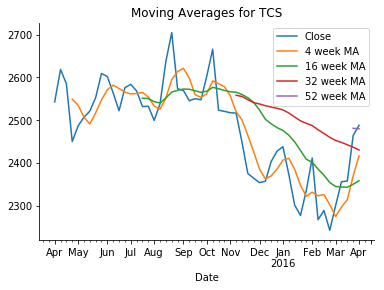

In [7]:
ax =  tcs_weeklyMA.plot(title="Moving Averages for TCS")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

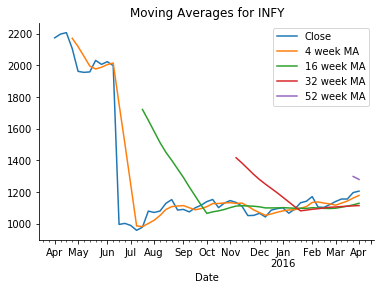

In [8]:

ax = infy_weeklyMA.plot(title="Moving Averages for INFY")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

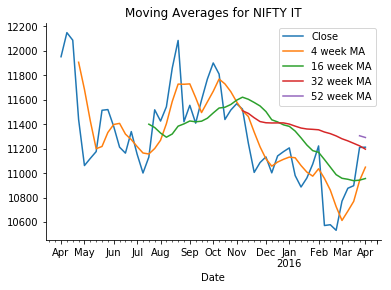

In [9]:
ax = niftyit_weeklyMA.plot( title="Moving Averages for NIFTY IT")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

### Handle unequal time series due to stock market holidays ###

In [10]:
## Handle Unqeual timeseries

tcs_2 = tcs.asfreq('D', method ='pad')
infy_2 = infy.asfreq('D', method ='pad')
niftyit_2 = niftyit.asfreq('D', method ='pad')


### Rolling window of size 10 and 75 on each stock/index ###

In [11]:
cols_to_fit = tcs.select_dtypes(include=[np.number]).columns

tcs10 = tcs_2[cols_to_fit].rolling(window=10).mean()
tcs75 = tcs_2[cols_to_fit].rolling(window=75).mean()

infy10 = infy_2[cols_to_fit].rolling(window=10).mean()
infy75 = infy_2[cols_to_fit].rolling(window=75).mean()

niftyit10 = niftyit_2.rolling(window=10).mean()
niftyit75 = niftyit_2.rolling(window=75).mean()



### Data Visualization ###

In [12]:
date = tcs_2.index
plot = figure(x_axis_type="datetime", x_axis_label='Date', title="TCS")

plot.line(date, tcs_2.Close, line_width=3, legend='Closing Price')
plot.line(date, tcs10.Close, line_width=3, legend='Avg Moving Price Window 10', line_color='red')
plot.line(date, tcs75.Close, line_width=3, legend='Avg Moving Price Window 75', line_color='yellow')

show(plot)


In [13]:
plot = figure(x_axis_type="datetime", x_axis_label='Date', title="INFY")

plot.line(infy_2.index, infy_2.Close, line_width=3, legend='Closing Price')
plot.line(infy_2.index, infy10.Close, line_width=3, legend='MA - Window 10', line_color='red')
plot.line(infy_2.index, infy75.Close, line_width=3, legend='MA - Window 75', line_color='yellow')

show(plot)

In [14]:

plot = figure(x_axis_type="datetime", x_axis_label='Date', title="NIFTY IT")

plot.line(niftyit_2.index, niftyit_2.Close, line_width=3, legend='Closing Price')
plot.line(niftyit_2.index, niftyit10.Close, line_width=3, legend='MA - Window 10', line_color='red')
plot.line(niftyit_2.index, niftyit75.Close, line_width=3, legend='MA - Window 75', line_color='yellow')

show(plot)

### Creation of dummy time series ###

In [15]:
tcs['volume_change'] = (tcs['Volume']/tcs['Volume'].shift(1))-1
x = np.logical_or((tcs['Volume'].pct_change() > 0.1),(tcs['Volume'].pct_change()< -.1))
tcs['volume_shock'] = np.where(x,1,0)
tcs['volume_shock_direction'] = np.where(tcs['volume_change']>0,1,0)

tcs['price_diff'] = (tcs['Close']/tcs['Close'].shift(1))-1
x = np.logical_or((tcs['Close'].pct_change() > 0.02),(tcs['Close'].pct_change()< -.02))
tcs['price_shock'] = np.where(x,1,0)
tcs['price_shock_direction'] = np.where(tcs['price_diff']>0,1,0)

tcs['price_shock_only'] = np.where(np.logical_and((tcs['price_shock'] == 1),
   (tcs['volume_shock'] == 0)),1,0)


infy['volume_change'] = (infy['Volume']/infy['Volume'].shift(1))-1
x = np.logical_or((infy['Volume'].pct_change() > 0.1),(infy['Volume'].pct_change()< -.1))
infy['volume_shock'] = np.where(x,1,0)
infy['volume_shock_direction'] = np.where(infy['volume_change']>0,1,0)

infy['price_diff'] = (infy['Close']/infy['Close'].shift(1))-1
x = np.logical_or((infy['Close'].pct_change() > 0.02),(infy['Close'].pct_change()< -.02))
infy['price_shock'] = np.where(x,1,0)
infy['price_shock_direction'] = np.where(infy['price_diff']>0,1,0)

infy['price_shock_only'] = np.where(np.logical_and((infy['price_shock'] == 1),
   (infy['volume_shock'] == 0)),1,0)


niftyit['volume_change'] = (niftyit['Volume']/niftyit['Volume'].shift(1))-1
x = np.logical_or((niftyit['Volume'].pct_change() > 0.1),(niftyit['Volume'].pct_change()< -.1))
niftyit['volume_shock'] = np.where(x,1,0)
niftyit['volume_shock_direction'] = np.where(niftyit['volume_change']>0,1,0)

niftyit['price_diff'] = (niftyit['Close']/niftyit['Close'].shift(1))-1
x = np.logical_or((niftyit['Close'].pct_change() > 0.02),(niftyit['Close'].pct_change()< -.02))
niftyit['price_shock'] = np.where(x,1,0)
niftyit['price_shock_direction'] = np.where(niftyit['price_diff']>0,1,0)

niftyit['price_shock_only'] = np.where(np.logical_and((niftyit['price_shock'] == 1),
   (niftyit['volume_shock'] == 0)),1,0)

# Part 2 #

## Data Visualization

In [16]:


list_1 = []
for x,y in zip(infy_2.reset_index().Date,infy_2.reset_index().Date.shift()):
    list_1.append([y,x])

list_2 = []
for x,y in zip(infy_2.Close,infy_2.Close.shift()):
    list_2.append([y,x])

list_1 = list_1[1:]
list_2 = list_2[1:]

### I have not colored the graph on 52 week MA because i have one year of data an it does not add any value

In [17]:
## to created 52 - MA gradient 
from bokeh.palettes import magma
from bokeh.palettes import Spectral6
from bokeh.transform import linear_cmap
from bokeh.models import ColumnDataSource, ColorBar

import matplotlib.colors as mcol
import matplotlib.cm as cm
def rgb2hex(r,g,b):
    hex = "#{:02x}{:02x}{:02x}".format(r,g,b)
    return hex



infy_diff_avg = (infy_2.Close.rolling(100).mean().shift()-infy_2.Close.rolling(2).mean()).fillna(0)


cm1 = mcol.LinearSegmentedColormap.from_list("MyCmapName",['blue', 'lightblue'])
cpick = cm.ScalarMappable(cmap=cm1)
cpick.set_array([])
percentages = []
max_diff = infy_diff_avg.abs().max()


for item in infy_diff_avg.iteritems():
    percentages.append(np.abs(item[1])/max_diff)

rgba_array = cpick.to_rgba(percentages)
color_array = []
for row in rgba_array:
    color_array.append(rgb2hex(int(row[0]*255),int(row[1]*255),int(row[2]*255)))
    

color_array = color_array[1:]

    

plot = figure(x_axis_type="datetime", x_axis_label='Date', y_axis_label='Closing Price')


plot.multi_line(list_1,list_2,color=color_array)
show(plot)



In [19]:
date = tcs.index


from bokeh.transform import linear_cmap
from bokeh.palettes import Spectral6


plot = figure(x_axis_type="datetime", x_axis_label='Date', y_axis_label='Closing Price',y_range=[100,18000],plot_width=1000,plot_height=1000)

plot.line(date, tcs.Close, line_width=3, legend='tcs')
plot.line(date, np.where(np.logical_xor(tcs.volume_shock,tcs.volume_shock.shift()),tcs.Close,np.NaN), legend='TCS - Volume shock',line_color='red',line_width=3)

plot.line(date, infy.Close, line_width=4, legend='infy')
plot.line(date, np.where(np.logical_xor(infy.volume_shock,infy.volume_shock.shift()),infy.Close,np.NaN), legend='Infy - Volume shock',line_color='red',line_width=4)

plot.line(date, niftyit.Close, line_width=6, legend='niftyit')
plot.line(date, np.where(np.logical_xor(niftyit.volume_shock,niftyit.volume_shock.shift()),niftyit.Close,np.NaN), legend='NiftyIT - Volume shock',line_color='red',line_width=4)


plot.circle(date, tcs.Close*tcs['price_shock_only'], size=8, legend='tcs closing Pricing shock without volume shock')
plot.circle(date, infy.Close*infy['price_shock_only'], size=8, legend='infy closing Pricing shock without volume shock', fill_color="red")
plot.circle(date, niftyit.Close*niftyit['price_shock_only'], size=8, legend='niftyit closing Pricing shock without volume shock', fill_color="yellow")

show(plot)
